In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

DATA_PATH = '.'

def load_data(data_path=DATA_PATH, filename="gun-violence-data_01-2013_03-2018.csv"):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

all_data = load_data()

In [2]:
# filter only CA
CA_data = all_data.loc[all_data['state']=='California']
CA_data = CA_data.reset_index()
CA_data.head()

index  incident_id        date       state   city_or_county  \
0      1       460726  2013-01-01  California        Hawthorne   
1      8       479389  2013-01-21  California        Brentwood   
2     16       479580  2013-02-03  California    Yuba (county)   
3     19       480311  2013-02-11  California          Vallejo   
4     22       480358  2013-02-19  California  Orange (county)   

                        address  n_killed  n_injured  \
0  13500 block of Cerise Avenue         1          3   
1    1100 block of Breton Drive         0          4   
2   5800 block of Poplar Avenue         1          3   
3  800 block of Humboldt Street         1          4   
4                Katella Avenue         4          3   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/460726   
1  http://www.gunviolencearchive.org/incident/479389   
2  http://www.gunviolencearchive.org/incident/479580   
3  http://www.gunviolencearchive.org/incident/480311   
4  http://www.gunviolencearchive.org/incident/480358   

                                          source_url  ...  \
0  http://www.dailybulletin.com/article/zz/201301...  ...   
1  http://sanfrancisco.cbslocal.com/2013/01/22/4-...  ...   
2  http://sacramento.cbslocal.com/2013/02/04/1-de...  ...   
3  http://archive.news10.net/news/article/229997/...  ...   
4  http://www.dailymail.co.uk/news/article-228117...  ...   

              participant_age  \
0                       0::20   
1                         NaN   
2  0::20||4::25||5::18||6::19   
3                       0::22   
4  0::20||4::69||5::27||6::20   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   

                                  participant_gender  \
0                                            0::Male   
1        0::Male||1::Male||2::Male||3::Male||4::Male   
2  0::Male||1::Male||2::Female||4::Male||5::Male|...   
3    0::Male||1::Male||2::Male||3::Female||4::Female   
4               0::Female||4::Male||5::Male||6::Male   

                                    participant_name  \
0                                  0::Bernard Gillis   
1                                                NaN   
2  0::Teng Yang||1::Tou Yang||2::Xong Yang||3::Ya...   
3                                    0::Oscar Garcia   
4  0::Courtney Aoki||4::Melvin Edwards||5::Jeremy...   

                            participant_relationship  \
0                                                NaN   
1                                                NaN   
2  4::Drive by - Random victims||5::Drive by - Ra...   
3                                                NaN   
4                                                NaN   

                                  participant_status  \
0      0::Killed||1::Injured||2::Injured||3::Injured   
1  0::Injured||1::Injured||2::Injured||3::Injured...   
2  0::Killed||1::Injured||2::Injured||3::Injured|...   
3  0::Killed||1::Injured||2::Injured||3::Injured|...   
4  0::Killed||1::Injured||2::Injured||3::Injured|...   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
3  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
4  0::Victim||1::Victim||2::Victim||3::Victim||4:...   

                                             sources  state_house_district  \
0  http://losangeles.cbslocal.com/2013/01/01/man-...                  62.0   
1  http://www.contracostatimes.com/ci_22426767/br...                  11.0   
2  http://news.asiantown.net/r/28306/no-death-pen...                   3.0   
3  http://www.timesheraldonline.

In [3]:
CA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        16306 non-null  int64  
 1   incident_id                  16306 non-null  int64  
 2   date                         16306 non-null  object 
 3   state                        16306 non-null  object 
 4   city_or_county               16306 non-null  object 
 5   address                      15658 non-null  object 
 6   n_killed                     16306 non-null  int64  
 7   n_injured                    16306 non-null  int64  
 8   incident_url                 16306 non-null  object 
 9   source_url                   16272 non-null  object 
 10  incident_url_fields_missing  16306 non-null  bool   
 11  congressional_district       15792 non-null  float64
 12  gun_stolen                   9579 non-null   object 
 13  gun_type        

In [4]:
CA_data.describe()

index   incident_id      n_killed     n_injured  \
count   16306.000000  1.630600e+04  16306.000000  16306.000000   
mean   122220.565865  5.712563e+05      0.341101      0.468784   
std     71289.381392  3.030802e+05      0.570285      0.788705   
min         1.000000  9.216200e+04      0.000000      0.000000   
25%     56397.500000  2.922728e+05      0.000000      0.000000   
50%    123505.500000  5.583810e+05      0.000000      0.000000   
75%    186790.750000  8.541395e+05      1.000000      1.000000   
max    239660.000000  1.083157e+06     16.000000     19.000000   

       congressional_district      latitude     longitude  n_guns_involved  \
count            15792.000000  15992.000000  15992.000000      9580.000000   
mean                22.572125     36.115585   -119.924691         1.771294   
std                 14.311983      2.096056      2.016817        11.032518   
min                  1.000000     32.545300   -124.321000         1.000000   
25%                 12.000000     34.043700   -121.875000         1.000000   
50%                 20.000000     36.682600   -119.779000         1.000000   
75%                 35.000000     37.790825   -118.184000         1.000000   
max                 53.000000     41.898900   -114.589000       400.000000   

       state_house_district  state_senate_district  
count          15791.000000           15791.000000  
mean              33.750997              16.955481  
std               21.493155              10.763364  
min                1.000000               1.000000  
25%               17.000000               9.000000  
50%               31.000000              14.000000  
75%               52.000000              25.000000  
max               80.000000              40.000000

In [5]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

# Drop
processed_data = deepcopy(CA_data)
dropped_columns = ['incident_id', 'address', 'incident_url', 'source_url', 'incident_url_fields_missing', 'gun_stolen', 'gun_type', 'location_description', 'n_guns_involved', 'notes', 'participant_age', 'participant_name', 'participant_relationship', 'sources']

processed_data = processed_data.drop(dropped_columns, axis=1)

In [6]:
processed_data['month'] = pd.DatetimeIndex(processed_data['date']).month
processed_data['year'] = pd.DatetimeIndex(processed_data['date']).year

In [7]:
def getColumnDict(column_name):
    column = processed_data[column_name]
    temp_dict = {}
    for line in column:
        s = str(line).replace('||', '|')
        arr = s.split('|')
        for e in arr:
            e = e.replace('::', ':')
            if e.find(':') != -1:
                e = e[e.find(':')+1:]
            if e not in temp_dict:
                #print(e)
                temp_dict[e] = 1
            else:
                temp_dict[e] += 1
    temp_dict = sorted(temp_dict.items(), key=lambda d: d[1], reverse=True)
    return temp_dict

In [8]:
chara_dict = getColumnDict('incident_characteristics')

In [9]:
age_group_dict = getColumnDict('participant_age_group')
print(age_group_dict)

[('Adult 18+', 20770), ('nan', 2491), ('Teen 12-17', 1485), ('Child 0-11', 201)]


In [10]:
gender_dict = getColumnDict('participant_gender')
print(gender_dict)

[('Male', 21251), ('Female', 2398), ('nan', 1946)]


In [11]:
status_dict = getColumnDict('participant_status')
print(status_dict)

[('Injured', 7372), ('Unharmed, Arrested', 5782), ('Killed', 5546), ('Unharmed', 5271), ('nan', 1704), ('Arrested', 637), ('Injured, Arrested', 266), ('Killed, Arrested', 10), ('Injured, Unharmed, Arrested', 4), ('Killed, Unharmed', 3), ('Killed, Unharmed, Arrested', 3), ('Killed, Injured', 1), ('Injured, Unharmed', 1)]


In [12]:
type_dict = getColumnDict('participant_type')
print(type_dict)

[('Subject-Suspect', 13473), ('Victim', 13064), ('nan', 1065)]


In [13]:
# add new columns to our dataframe
new_columns = [['child_participants', 'teen_participants', 'adult_participants'],
              ['male_participants', 'female_participants'],
              ['arrested_participants', 'injured_participants', 'killed_participants', 'unharmed_participants'],
              ['victims_involved', 'suspects_identified']];

for item in new_columns:
    for col in item:
        processed_data[col] = 0;

processed_data.head()

index        date       state   city_or_county  n_killed  n_injured  \
0      1  2013-01-01  California        Hawthorne         1          3   
1      8  2013-01-21  California        Brentwood         0          4   
2     16  2013-02-03  California    Yuba (county)         1          3   
3     19  2013-02-11  California          Vallejo         1          4   
4     22  2013-02-19  California  Orange (county)         4          3   

   congressional_district                           incident_characteristics  \
0                    43.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
1                     9.0  Shot - Wounded/Injured||Drive-by (car to stree...   
2                     3.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
3                     5.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
4                    46.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   

   latitude  longitude  ... teen_participants adult_participants  \
0   33.9090   -118.333  ...                 0                  0   
1   37.9656   -121.718  ...                 0                  0   
2   39.1236   -121.583  ...                 0                  0   
3   38.1072   -122.228  ...                 0                  0   
4   33.8031   -117.943  ...                 0                  0   

  male_participants female_participants  arrested_participants  \
0                 0                   0                      0   
1                 0                   0                      0   
2                 0                   0                      0   
3                 0                   0                      0   
4                 0                   0                      0   

   injured_participants  killed_participants  unharmed_participants  \
0                     0                    0                      0   
1                     0                    0                      0   
2                     0                    0                      0   
3                     0                    0                      0   
4                     0                    0                      0   

   victims_involved  suspects_identified  
0                 0                    0  
1                 0                    0  
2                 0                    0  
3                 0                    0  
4                 0                    0  

[5 rows x 29 columns]

In [14]:
# Extract for each row: from column_name_list[i] extract info_list[i] values.
# Return list of dictionaries where dictionary at list[i] corresponds to column_name_list[i].
# 5::Injured||6::Unharmed||7::Unharmed, Arrested||8::Unharmed, Arrested||9::Unharmed, Arrested
processed_data_new = processed_data.copy()

new_columns = [['child_participants', 'teen_participants', 'adult_participants'],
              ['male_participants', 'female_participants'],
              ['arrested_participants', 'injured_participants', 'killed_participants', 'unharmed_participants'],
              ['victims_involved', 'suspects_identified']];

info_list = [
               ['Child', 'Teen','Adult'],
               ['Male', 'Female'],
               ['Arrested', 'Injured', 'Killed', 'Unharmed'],
               ['Victim', 'Suspect']
            ];

def extractInfoFromColumns(row_index, column_name_list, info_list, new_columns):
    
    temp_dict = {}
    for i in range(len(column_name_list)):
        column_name = column_name_list[i]
        line = processed_data.at[row_index,column_name]        
        #print(line)
        #break
        s = str(line).replace('||', '|')
        arr = s.split('|')
        for e in arr:
            e = e.replace('::', ':')
            if e.find(':') != -1:
                e = e[e.find(':')+1:]
            
            if ", Arrested" in e:
                e= 'Arrested'
            
            #print(e)
            item = info_list[i]                
            for j in range(len(item)):
                #print(item[j])
                if item[j] in e:
                    new_col = new_columns[i][j]
                    if new_col not in temp_dict:
                        #print(e)
                        temp_dict[new_col] = 1
                    else:
                        temp_dict[new_col] += 1
                #else:
                    #print('not found '+item[j])
    #print(temp_dict)
    for key, value in temp_dict.items():
        processed_data_new.at[row_index,key] = value
        
cols = ['participant_age_group', 'participant_gender', 'participant_status', 'participant_type']
for i in range(len(processed_data)):
    extractInfoFromColumns(i, cols, info_list, new_columns)

    
processed_data_new.head()

index        date       state   city_or_county  n_killed  n_injured  \
0      1  2013-01-01  California        Hawthorne         1          3   
1      8  2013-01-21  California        Brentwood         0          4   
2     16  2013-02-03  California    Yuba (county)         1          3   
3     19  2013-02-11  California          Vallejo         1          4   
4     22  2013-02-19  California  Orange (county)         4          3   

   congressional_district                           incident_characteristics  \
0                    43.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
1                     9.0  Shot - Wounded/Injured||Drive-by (car to stree...   
2                     3.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
3                     5.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
4                    46.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   

   latitude  longitude  ... teen_participants adult_participants  \
0   33.9090   -118.333  ...                 0                  4   
1   37.9656   -121.718  ...                 3                  1   
2   39.1236   -121.583  ...                 0                  7   
3   38.1072   -122.228  ...                 0                  5   
4   33.8031   -117.943  ...                 0                  7   

  male_participants female_participants  arrested_participants  \
0                 1                   0                      0   
1                 5                   0                      0   
2                 5                   1                      3   
3                 3                   2                      0   
4                 3                   1                      0   

   injured_participants  killed_participants  unharmed_participants  \
0                     3                    1                      0   
1                     4                    0                      1   
2                     3                    1                      0   
3                     4                    1                      0   
4                     3                    4                      0   

   victims_involved  suspects_identified  
0                 4                    1  
1                 4                    1  
2                 4                    3  
3                 5                    0  
4                 6                    1  

[5 rows x 29 columns]

In [15]:
# dropping the original columns after parsing
processed_data_new = processed_data_new.drop('incident_characteristics', axis=1)
processed_data_new = processed_data_new.drop('participant_age_group', axis=1)
processed_data_new = processed_data_new.drop('participant_gender', axis=1)
processed_data_new = processed_data_new.drop('participant_status', axis=1)
processed_data_new = processed_data_new.drop('participant_type', axis=1)
processed_data_new = processed_data_new.drop('killed_participants', axis=1) #same as n_killed
processed_data_new = processed_data_new.drop('injured_participants', axis=1) #same as n_injured
processed_data_new = processed_data_new.drop('date', axis=1)
processed_data_new = processed_data_new.drop('state', axis=1) 

In [16]:
processed_data_new["city_or_county"].value_counts()

Oakland                                  1478
Los Angeles                              1066
Fresno                                   1057
Bakersfield                               605
Stockton                                  555
                                         ... 
Diamond Bar                                 1
Bayside                                     1
Montague                                    1
City Of Industry (West Puente Valley)       1
Montgomery Creek                            1
Name: city_or_county, Length: 967, dtype: int64

In [17]:
#checking for null values
print(processed_data_new.isnull().sum())

index                       0
city_or_county              0
n_killed                    0
n_injured                   0
congressional_district    514
latitude                  314
longitude                 314
state_house_district      515
state_senate_district     515
month                       0
year                        0
child_participants          0
teen_participants           0
adult_participants          0
male_participants           0
female_participants         0
arrested_participants       0
unharmed_participants       0
victims_involved            0
suspects_identified         0
dtype: int64


In [18]:
processed_data_new[processed_data_new.isnull().any(axis=1)].head()

index city_or_county  n_killed  n_injured  congressional_district  \
38     277        Oakland         1          0                     NaN   
328   4862        Gardena         0          1                     NaN   
413   6070       Brisbane         0          0                     NaN   
460   6825        Oakland         1          1                     NaN   
481   7078        Oakland         1          1                     NaN   

     latitude  longitude  state_house_district  state_senate_district  month  \
38        NaN        NaN                   NaN                    NaN     12   
328   33.8815   -118.295                   NaN                    NaN      2   
413   37.6883   -122.407                   NaN                    NaN      2   
460       NaN        NaN                   NaN                    NaN      2   
481       NaN        NaN                   NaN                    NaN      2   

     year  child_participants  teen_participants  adult_participants  \
38   2013                   0                  1                   0   
328  2014                   0                  0                   1   
413  2014                   0                  0                   1   
460  2014                   0                  0                   3   
481  2014                   0                  0                   3   

     male_participants  female_participants  arrested_participants  \
38                   1                    0                      0   
328                  1                    0                      0   
413                  1                    0                      1   
460                  3                    0                      0   
481                  2                    0                      1   

     unharmed_participants  victims_involved  suspects_identified  
38                       0                 1                    0  
328                      0                 0                    1  
413                      0                 0                    1  
460                      1                 2                    1  
481                      0                 2                    1

In [19]:
processed_data_new = processed_data_new.dropna(subset=["congressional_district", 
                                                       "state_senate_district",
                                                       "state_house_district"])
#checking for null values after dropping
print(processed_data_new.isnull().sum())

index                     0
city_or_county            0
n_killed                  0
n_injured                 0
congressional_district    0
latitude                  0
longitude                 0
state_house_district      0
state_senate_district     0
month                     0
year                      0
child_participants        0
teen_participants         0
adult_participants        0
male_participants         0
female_participants       0
arrested_participants     0
unharmed_participants     0
victims_involved          0
suspects_identified       0
dtype: int64


Start machine learning


In [20]:
#splitting data into train and test for analysis
train_set, test_set = train_test_split(processed_data_new, test_size=0.2, random_state=42)

print("train: ",train_set.shape)
print("test: ",test_set.shape)

train:  (12632, 20)
test:  (3158, 20)


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
imp_mean = SimpleImputer(strategy = 'median', fill_value = 0)

In [23]:

train_set_num = train_set.drop('city_or_county', axis=1)
train_set_cat = train_set[['city_or_county']]

num_pipeline = Pipeline([
        ('imputer', imp_mean),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(train_set_num)
cat_attribs = ["city_or_county"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

X_train = full_pipeline.fit_transform(train_set)
X_train

array([[ 0.7626903 , -0.59054913, -0.60028177, ..., -0.43147992,
        -0.89361704,  0.17236801],
       [ 0.94462249, -0.59054913,  0.68297416, ..., -0.43147992,
         0.22115389, -0.80053311],
       [-0.66021913, -0.59054913, -0.60028177, ...,  2.20095398,
        -0.89361704,  1.14526914],
       ...,
       [-0.59702089,  1.16884159, -0.60028177, ..., -0.43147992,
         0.22115389, -0.80053311],
       [-1.5191317 ,  1.16884159,  0.68297416, ...,  0.88473703,
         1.33592482,  0.17236801],
       [-0.13374179, -0.59054913, -0.60028177, ..., -0.43147992,
        -0.89361704,  0.17236801]])

In [24]:
test_set_num = test_set.drop('city_or_county', axis=1)
test_set_cat = test_set[['city_or_county']]

X_test = full_pipeline.transform(test_set_num)
X_test

array([[ 0.94837586,  1.16884159, -0.60028177, ..., -0.43147992,
         0.22115389, -0.80053311],
       [-1.63630764, -0.59054913, -0.60028177, ..., -0.43147992,
        -0.89361704, -0.80053311],
       [ 0.70651723,  1.16884159, -0.60028177, ...,  2.20095398,
         0.22115389,  1.14526914],
       ...,
       [ 1.33398145, -0.59054913, -0.60028177, ..., -0.43147992,
        -0.89361704,  0.17236801],
       [ 0.05389835, -0.59054913,  5.81599786, ..., -0.43147992,
         4.6802376 , -0.80053311],
       [-0.70014649,  1.16884159, -0.60028177, ..., -0.43147992,
         0.22115389, -0.80053311]])

In [25]:
# find index of 'arrested_participants'
i = 0
for column in processed_data_new:
    if column == 'arrested_participants':
        break
    i += 1
print(i)

16


In [26]:
cy_train = X_train[:, i]
cy_test = X_test[:, i]
cX_train = np.delete(X_train, [i], axis=1)
cX_test = np.delete(X_test, [i], axis=1)

print(len(cy_test), len(cy_train), len(cX_test), len(cX_train))

3158 12632 3158 12632


In [27]:
# whether there are people arrested is the label
MIN = 999
for i in range(len(cy_train)):
    if MIN > cy_train[i]:
        MIN = cy_train[i]

# if there are people arrested, then the label is 1. Otherwise 0.
for i in range(len(cy_train)):
    if MIN == cy_train[i]:
        cy_train[i] = 0
    else:
        cy_train[i] = 1
for i in range(len(cy_test)):
    if MIN == cy_test[i]:
        cy_test[i] = 0
    else:
        cy_test[i] = 1

Accuracy: 0.9578847371754274
Precision: 0.9284525790349417
Recall: 0.8611111111111112


c:\Users\tinph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


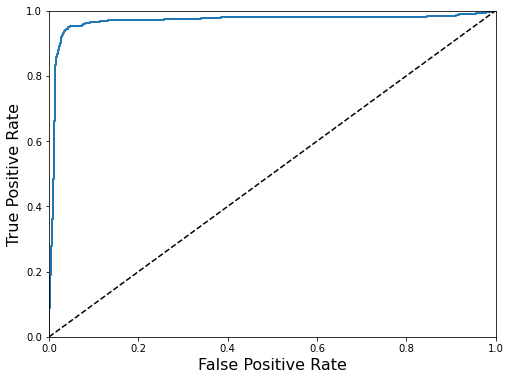

Area under curve: 0.9679282868525897


In [28]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

# Using SVC
svm_clf = LinearSVC(C=1, loss="hinge")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve

svm_clf.fit(cX_train, cy_train)
cy_pred = svm_clf.predict(cX_test)
print("Accuracy:", accuracy_score(cy_test, cy_pred))
print("Precision:", precision_score(cy_test, cy_pred))
print("Recall:", recall_score(cy_test, cy_pred))

cy_scores = svm_clf.decision_function(cX_test)
fpr, tpr, thresholds = roc_curve(cy_test, cy_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

print("Area under curve:", roc_auc_score(cy_test, cy_scores))

In [45]:
from sklearn.cluster import KMeans
scaler = StandardScaler() # Use a new scaler for clustering because we need to claim a variable so that we can inverse later
raw_cluster_data = processed_data_new.drop(["index", "city_or_county"],axis=1)
cluster_data = scaler.fit_transform(raw_cluster_data) # city_or_county is dropped
for x in raw_cluster_data:
    print(x)

n_killed
n_injured
congressional_district
latitude
longitude
state_house_district
state_senate_district
month
year
child_participants
teen_participants
adult_participants
male_participants
female_participants
arrested_participants
unharmed_participants
victims_involved
suspects_identified


c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\clust

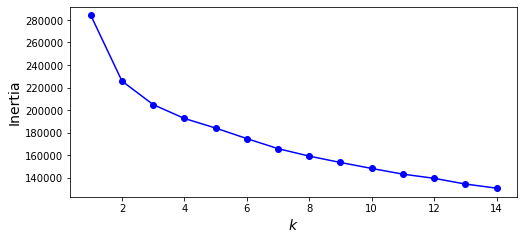

In [46]:
maxk = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data)
                for k in range(1, maxk)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, maxk), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

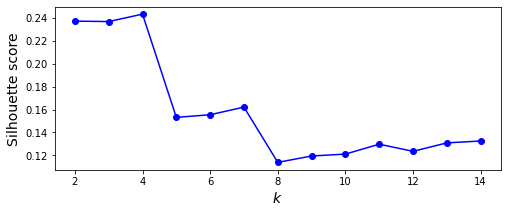

In [47]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(cluster_data, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, maxk), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers (inversed):


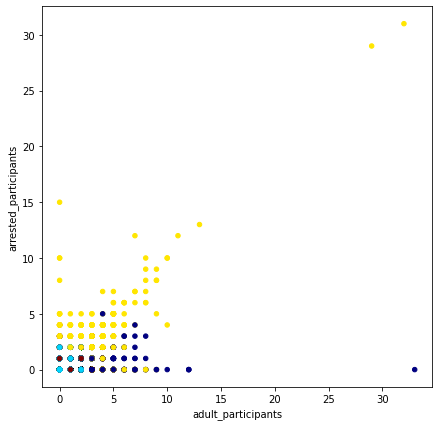

In [49]:
# Adult vs Participant arrested
est = KMeans(n_clusters=4)    
est.fit(cluster_data)
labels = est.labels_
true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
print("Cluster centers (inversed):")
raw_cluster_data["clusterlabel"] = labels
raw_cluster_data.plot(kind="scatter", x="adult_participants", y="arrested_participants",
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1)

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers (inversed):


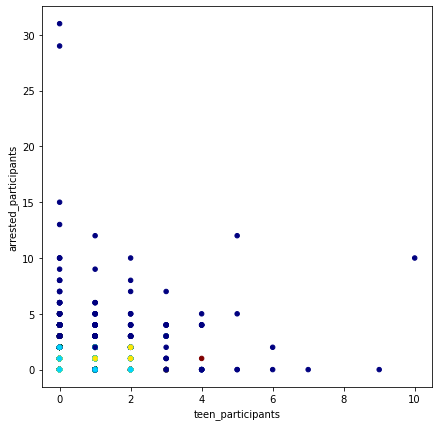

In [50]:
# Teenager vs Participant arrested
est = KMeans(n_clusters=4)    
est.fit(cluster_data)
labels = est.labels_
true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
print("Cluster centers (inversed):")
raw_cluster_data["clusterlabel"] = labels
raw_cluster_data.plot(kind="scatter", x="teen_participants", y="arrested_participants",
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1)

In [52]:
# Children vs Participant arrested
est = KMeans(n_clusters=4)    
est.fit(cluster_data)
labels = est.labels_
true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
print("Cluster centers (inversed):")
raw_cluster_data["clusterlabel"] = labels
raw_cluster_data.plot(kind="scatter", x="child_participants", y="arrested_participants",
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1)

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers (inversed):


In [53]:
# Unharmed vs Participant arrested
est = KMeans(n_clusters=4)    
est.fit(cluster_data)
labels = est.labels_
true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
print("Cluster centers (inversed):")
raw_cluster_data["clusterlabel"] = labels
raw_cluster_data.plot(kind="scatter", x="unharmed_participants", y="arrested_participants",
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1)

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers (inversed):


In [57]:
# Male vs Female participant
est = KMeans(n_clusters=3)    
est.fit(cluster_data)
labels = est.labels_
true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
print("Cluster centers (inversed):")
raw_cluster_data["clusterlabel"] = labels
raw_cluster_data.plot(kind="scatter", x="male_participants", y="female_participants",
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1)

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers (inversed):


In [55]:
# Children vs Participant arrested
est = KMeans(n_clusters=4)    
est.fit(cluster_data)
labels = est.labels_
true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
print("Cluster centers (inversed):")
raw_cluster_data["clusterlabel"] = labels
raw_cluster_data.plot(kind="scatter", x="victims_involved", y="suspects_identified",
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1)

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers (inversed):
